## 1. Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\razal\Downloads\real_estate_data.csv', sep='\t')         # открываем файл, указывая разделитель
pd.set_option('display.max_columns', None)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<a id='num_1'></a>

In [3]:
data.describe()            # изучаем некоторые статистические значения, чтобы выявить первые проблемы с количественными данными

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [4]:
data = data.rename(columns = {'cityCenters_nearest': 'city_center_nearest'})                         # переименуем 1 столбец

### Вывод

При изучении информации о таблице бросаются в глаза следующие проблемы:

- наличие пропусков в разных столбцах;
- некорректно выбран формат данных в отдельных столбцах;
- аномальные и неправдоподобные значения.

Необходима предобработка.

## 2. Предобработка данных

In [5]:
data.isna().sum()                                                                        # определим пропущенные значения

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_center_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

С целью последующего анализа кажется необходимым заполнить пропуски в следующих столбцах:

- `ceiling_height`
- `floors_total`
- `is_apartment`
- `balcony`
- `locality_name`.

Также обращают на себя внимание проблемы в правой части таблицы, где сосредоточилось большое количество пропусков. 

### 2.1 Столбец "ceiling_height"

Первое, что бросается в глаза еще при изучении таблицы - это большой разброс в этом столбце (от 1.0 до 100.0 метров). Такой высоты потолков, конечно же, не существует - мы имеем дело с выбросами. Посмотрим, насколько сильно они влияют на данные.

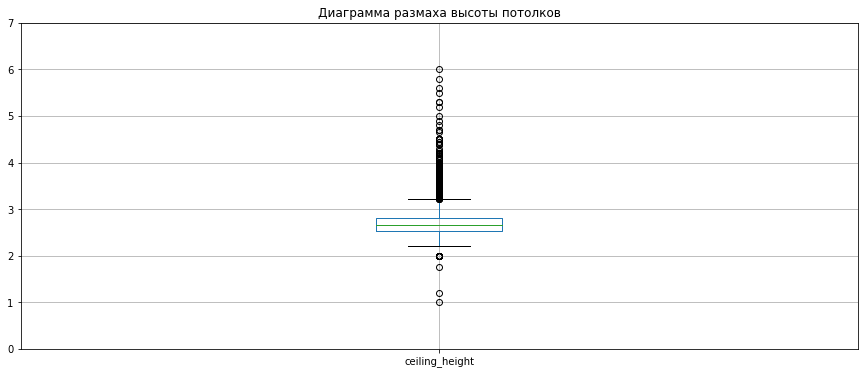

In [6]:
plt.figure(figsize=(15, 6)), plt.ylim(0, 7)                                            # выберем комфортный масштаб
data.boxplot(column='ceiling_height', figsize=(15, 6))                                 # построим диаграмму размаха
plt.title('Диаграмма размаха высоты потолков')
plt.show()

Видно, что потолки в основном имеют высоту 2,2 - 3,2 метра. Даже характерные для питерских квартир высокие потолки заканчиваются на отметке 6 метров. Можно избавиться от основных неправдоподобных значений (больше 6 метров и меньше 2). Но прежде чем избавиться, рассмотрим их внимательнее.

In [7]:
ceiling_emissions = data.query('ceiling_height < 2 or ceiling_height > 6').sort_values(by='ceiling_height', ascending=False)
ceiling_emissions

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.00,5.0,14.0,5,True,False,False,11.00,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
22336,19,9999000.0,92.4,2019-04-05T00:00:00,2,32.00,6.0,55.5,5,False,False,False,16.50,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.00,3.0,53.0,2,NaN,False,False,8.00,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21377,19,4900000.0,42.0,2017-04-18T00:00:00,1,27.50,24.0,37.7,19,False,False,False,11.00,2.0,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0
22938,14,4000000.0,98.0,2018-03-15T00:00:00,4,27.00,2.0,73.0,2,True,False,False,9.00,1.0,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.00,25.0,17.0,17,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
21824,20,2450000.0,44.0,2019-02-12T00:00:00,2,27.00,2.0,38.0,2,False,False,False,8.60,2.0,городской поселок Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.00,5.0,30.0,3,NaN,False,False,9.00,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.00,36.0,41.0,13,NaN,False,False,12.00,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
20478,11,8000000.0,45.0,2017-07-18T00:00:00,1,27.00,4.0,22.0,2,NaN,False,False,10.00,1.0,Санкт-Петербург,18975.0,3246.0,0.0,NaN,3.0,449.0,429.0


Глядя на верхние строки таблицы, можно заметить, что некоторые данные в столбце `ceiling_height` указаны с ошибкой - пропущена точка между целой частью и дробной (32 вместо 3.2). Числа в диапазоне от 32 до 20 легко исправить, а вот остальные на что не умножай, ничего полезного не выйдет. Поэтому избавимся от них.

In [8]:
for i in ceiling_emissions.index:                                # цикл пробежится по индексам в таблице аномальных значений
    if 20 <= data.loc[i, 'ceiling_height'] <= 32:                # если значение потолка 20-32, уменьшим его в 10 раз
        
        data.loc[i, 'ceiling_height'] = data.loc[i, 'ceiling_height'] / 10
        
    else: data = data.drop(labels = i, axis=0)                   # все остальные удалим из таблицы

Пропуски в этом столбце, возможно, образовались оттого, что владелец квартиры был небрежен и не указал нужные данные. Постараемся выполнить эту задачу за него. Квартиры в одном районе, вероятно, имеют схожую высоту потолка, поэтому сгруппируем их по удаленности от центра и аэропорта, а затем выведем медиану потолка по ближайшим домам.

In [9]:
data['ceiling_height'] = data['ceiling_height'].fillna(
                          data[data['city_center_nearest'].notna() & data['airports_nearest'].notna()]
    .groupby(['city_center_nearest','airports_nearest'])['ceiling_height']
    .transform(lambda group : group.fillna(group.median()))
)

In [10]:
data['ceiling_height'].isna().sum()

5486

Благодаря группировке удалось заполнить почти половину пропусков в столбце.

### 2.2 Столбец "floors_total"

Количество этажей - тоже немаловажный параметр при выборе жилья. Максимум в этом столбце достигает 60. Постараемся заполнить немногочисленные пропуски. В большинстве случаев дома, построенные в одном районе имеют примерно одинаковую высоту. Применим метод из раздела выше: сгруппируем дома по удаленности от центра и аэропорта, а затем выведем медиану этажа по ближайшим домам.

In [11]:
data['floors_total'] = data['floors_total'].fillna(data[data['city_center_nearest'].notna() & 
                                                        data['airports_nearest'].notna()]
                                                   .groupby(['city_center_nearest','airports_nearest'])['floors_total']
                                                   .transform(lambda group : group.fillna(group.median()))
                                                  )

In [12]:
data['floors_total'].isna().sum()                                  # проверим результат

24

Из 86 пропусков осталось 24. Предположим, что количество этажей в небольших населенных пунктах за границей Санкт-Петербурга тоже может совпадать. Но разница в написании городов помешает нам взять адекватный срез. Поэтому сначала попробуем устранить проблему с названиями, а потом вернуться к пропущенным этажам.

### 2.3 Столбцы "living_area" и "kitchen_area" 

In [13]:
# сгруппируем датасет по площади и количеству комнат: как правило от этого зависят жилая площадь кухни и комнат
gb = data.groupby(['total_area','rooms'])

# заполним пропуски средним значением по группе
data['living_area'] = data['living_area'].fillna(gb['living_area']
                                                 .transform(lambda group: group.mean() / (group.name[0])) * data['total_area'])

data['kitchen_area'] = data['kitchen_area'].fillna(gb['kitchen_area']
                                                 .transform(lambda group: group.mean() / (group.name[0])) * data['total_area'])

In [14]:
display(data['living_area'].isna().sum(), data['kitchen_area'].isna().sum())

212

421

### 2.4 Столбец "locality_name"

Очевидно, что Санкт-Петербург лидирует в списке населенных пунктов. Но также видно, что в названиях есть дубликаты (например, деревня Кудрово и Кудрово). Выделим и уберем такие разночтения.

In [15]:
# создадим функцию, которая будет заменять названия на верные, взятые из словаря ниже

def replace_names(dictionary):                                                                          
    for word in dictionary:
        data['locality_name'] = data['locality_name'].str.replace(word, dictionary[word])

In [16]:
places = {                                             # составим словарь дубликатов: ключ - старое название, значение - новое
    'посёлок': 'поселок',                              # при необходимости в такой словарь можно добавлять другие названия
    'поселок городского типа': 'поселок',
    'городской поселок': 'поселок',
    'садоводческое некоммерческое товарищество': 'садовое товарищество',
    'при железнодорожной станции': 'станции',
    'поселок Мурино': 'Мурино',
    'деревня Кудрово': 'Кудрово',
    'деревня Фёдоровское': 'поселок Фёдоровское',
    'деревня Щеглово': 'поселок Щеглово'
    }

replace_names(places)                                 # применим к словарю функцию replace_names

Теперь, когда проблема с названиями решена (по крайней мере в отношении самых крупных поселений), можно приступить к заполнению пропусков. В этом столбце их немного, поэтому всем пропущенным городам присвоим название "Санкт-Петербург". Это основная территориальная единица в регионе и большинство городов являются ее районами.

In [17]:
data.loc[data['locality_name'].isna(), 'locality_name'] = 'Санкт-Петербург'
data['locality_name'].value_counts().head(10)                  

Санкт-Петербург      15763
Мурино                 590
Кудрово                472
поселок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
Выборг                 237
Name: locality_name, dtype: int64

Теперь вернемся к значениям, пропущенным в столбце `floors_total`. Сгруппируем датафрейм по городам и заполним пропуски медианой этажности в конкретном населенном пункте.

In [18]:
data['floors_total'] = data['floors_total'].fillna(
                          data.groupby('locality_name')['floors_total'].transform(lambda group : group.fillna(group.median())))

### 2.5 Столбцы "is_apartment" и "balcony"

Будем исходить из предположения, что пропуски, оставленные в этом столбце подразумевали, что объект не относится к классу апартаментов, поэтому заменим их на значение `False`.

In [19]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Более чем 11 тыс. объявлений не содержат информации о наличии балконов, значит, скорее всего, их в квартире нет. Заменим пропуски в столбце на 0.

In [20]:
data['balcony'] = data['balcony'].fillna(0)

### 2.6 Пропущенные расстояния

Ликвидировать пропуски в правой части таблицы сложнее, потому что мы не знаем точных расстояний. Но обращает на себя внимание одна особенность:

In [21]:
data.query('locality_name == "Санкт-Петербург"').isna().sum()      # сравним пропуски расстояний в Петербурге и в пригородах

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          2462
floors_total               0
living_area              156
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area             273
balcony                    0
locality_name              0
airports_nearest          93
city_center_nearest       69
parks_around3000          69
parks_nearest           8468
ponds_around3000          69
ponds_nearest           7760
days_exposition         2084
dtype: int64

In [22]:
data.query('locality_name != "Санкт-Петербург"').isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          3024
floors_total               0
living_area               56
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area             148
balcony                    0
locality_name              0
airports_nearest        5447
city_center_nearest     5448
parks_around3000        5447
parks_nearest           7146
ponds_around3000        5447
ponds_nearest           6824
days_exposition         1097
dtype: int64

Основные пропуски при подсчете расстояний образуются в пригородах. Значит, алгоритм не настроен подсчитывать эти величины за границей Санкт-Петербурга, хотя на деле аэропорт может быть доступен не только жителям города. Парки и водоемы тоже в каждом населенном пункте могут быть свои.

Но поскольку данные столбцы не нужны для дальнейшего исследования, оставим пропуски в них оставим без изменений.

### 2.7 Изменение типа данных

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23689 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23689 non-null  int64  
 1   last_price            23689 non-null  float64
 2   total_area            23689 non-null  float64
 3   first_day_exposition  23689 non-null  object 
 4   rooms                 23689 non-null  int64  
 5   ceiling_height        18203 non-null  float64
 6   floors_total          23689 non-null  float64
 7   living_area           23477 non-null  float64
 8   floor                 23689 non-null  int64  
 9   is_apartment          23689 non-null  bool   
 10  studio                23689 non-null  bool   
 11  open_plan             23689 non-null  bool   
 12  kitchen_area          23268 non-null  float64
 13  balcony               23689 non-null  float64
 14  locality_name         23689 non-null  object 
 15  airports_nearest   

Нуждается в замене тип данных в столбцах:

- `first_day_exposition`
- `floors_total`
- `balcony`.

Тип данных в столбцах `parks_around3000`, `ponds_around3000`, `days_exposition` обусловлен пропусками.

In [24]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')          

In [25]:
display(data['first_day_exposition'].min(), data['first_day_exposition'].max())

Timestamp('2014-11-27 00:00:00')

Timestamp('2019-05-03 00:00:00')

Самое старое объявление датируется 27 ноября 2014, а самое свежее 3 мая 2019. Видимо, наши данные ограничены этим периодом. Предположим, что те объявления, для которых пропущено количество дней, продержались от даты своей публикации до последнего дня, доступного в датасете. Для подтверждения этой гипотезы посмотрим, где именно сосредоточились пропуски. Построим гистограммы по дате публикации для двух разных срезов.

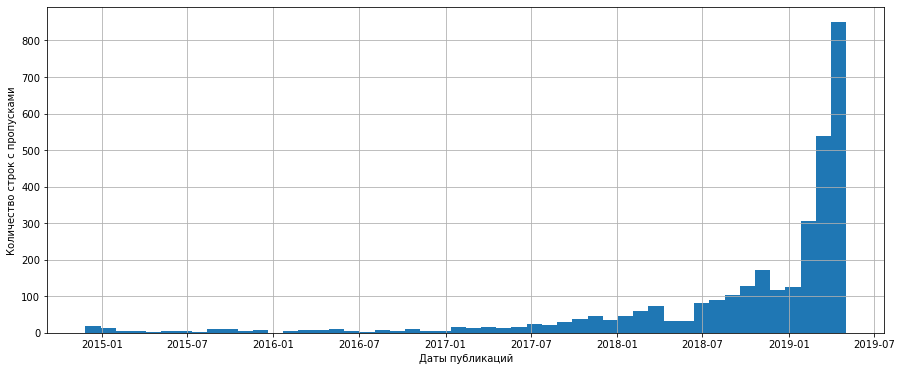

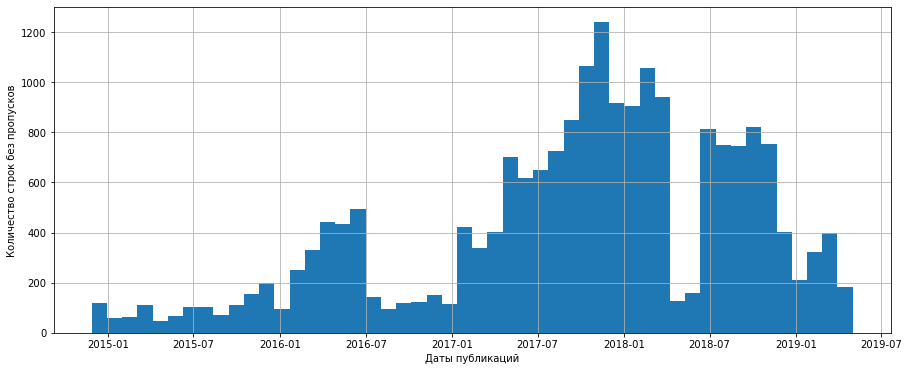

In [26]:
data[data['days_exposition'].isna()]['first_day_exposition'].hist(bins=50, figsize=(15, 6))
plt.xlabel('Даты публикаций')
plt.ylabel('Количество строк с пропусками')
plt.show() 

data[data['days_exposition'].notna()]['first_day_exposition'].hist(bins=50, figsize=(15, 6))
plt.xlabel('Даты публикаций')
plt.ylabel('Количество строк без пропусков')
plt.show() 

Видно, что количество строк с пропущенной длительностью резко вырастает к последнему дню датасета, тогда как для других объявлений такой закономерности не наблюдается. Значит, пропуски появились из-за ограниченного среза данных: квартиры, которые попали в датасет поздно не успели продаться на момент выгрузки.

Заполним пропуски таким же образом, как поступали выше: сгруппируем жилье по району, количеству комнат и цене, а затем заполним пропуски медианным значением продолжительности продаж.

In [27]:
data['days_exposition'] = data['days_exposition'].fillna(data[data['city_center_nearest'].notna() & 
                                                                 data['airports_nearest'].notna()]
                                                .groupby(['city_center_nearest','airports_nearest', 'rooms'])['days_exposition']
                                                .transform(lambda group : group.fillna(group.median()))
                                                  )

In [28]:
data['days_exposition'].isna().sum()

2300

Треть пропусков удалось заполнить.

### Вывод

Скорректированы названия столбцов и написание некоторых населенных пунктов.

Пропуски там, где это возможно, заполнены булевой переменной, нулевым значением или медианой, рассчитанной по районам. Пропуски в столбцах с площадями заполнены средним значением по аналогичным квартирам.

Пропуски расстояний в правой части датасета, скорее всего, возникли при сборе данных для Санкт-Петербурга и пригородов. Эту проблему не стоит маскировать. 

Также исправлены типы данных в некоторых столбцах.

## 3. Расчёты и добавление результатов в таблицу

### 3.1 Цена за квадратный метр

In [29]:
data['price_per_m'] = (data['last_price'] / data['total_area']).round(2) # добавим столбец со стоимостью квадратного метра

### 3.2 День недели, месяц и год публикации объявления

In [30]:
data['weekday'] = data['first_day_exposition'].dt.weekday   # создадим отдельные столбцы, получив из даты публикации день недели
data['month'] = data['first_day_exposition'].dt.month       # месяц
data['year'] = data['first_day_exposition'].dt.year         # год

### 3.3 Категоризация по этажам

In [31]:
def floors_grouped(row):                                     # создадим функцию для строки
    floor = row['floor']                                     # нам понадобятся значение этажа
    floors_total = row['floors_total']                       # и общее количество этажей в доме
    try:
        if floor == 1:                                       # зададим условия для категорий
            return 'первый'
        if floor == floors_total:
            return 'последний'
        else:
            return 'другой'
    except:                                                  # предусмотрим исключения для ошибок
        return 'Ошибочное значение'
    
data['floors_grouped'] = data.apply(floors_grouped, axis=1)  # создадим новый столбец, применив функцию ко всему датафрейму

### 3.4 Соотношение площадей

In [32]:
data['area_living_total'] = (data['living_area'] / data['total_area'])               # создадим новые столбцы
data['area_kitchen_total'] = (data['kitchen_area'] / data['total_area'])

Мы подготовили данные для исследования, но таблица разрослась до огромных размеров, некоторые столбцы избыточны и не нужны для дальнейшего исследования. Создадим новую на ее основе.

In [33]:
data_compact = data[['price_per_m', 'total_area', 'locality_name', 'first_day_exposition', 
                     'weekday', 'month', 'year', 'days_exposition', 'rooms', 'ceiling_height', 
                     'city_center_nearest', 'floors_grouped']]
data_compact.describe()

,price_per_m,total_area,weekday,month,year,days_exposition,rooms,ceiling_height,city_center_nearest
count,2.368900e+04,23689.00000,23689.000000,23689.000000,23689.000000,21389.000000,23689.000000,18203.000000,18172.000000
mean,9.940374e+04,60.35470,2.569336,6.399553,2017.367217,181.694118,2.070835,2.725383,14191.012602
std,5.020870e+04,35.65954,1.789170,3.491856,1.039790,219.541280,1.078503,0.265609,8609.342832
min,1.118300e+02,12.00000,0.000000,1.000000,2014.000000,1.000000,0.000000,2.000000,181.000000
25%,7.658451e+04,40.00000,1.000000,3.000000,2017.000000,45.000000,1.000000,2.550000,9237.000000
50%,9.500000e+04,52.00000,3.000000,6.000000,2017.000000,97.000000,2.000000,2.650000,13098.500000
75%,1.142534e+05,69.90000,4.000000,10.000000,2018.000000,233.000000,3.000000,2.800000,16293.000000
max,1.907500e+06,900.00000,6.000000,12.000000,2019.000000,1580.000000,19.000000,6.000000,65968.000000


### Вывод

Мы ввели категоризацию для различных этажей и добавили в таблицу дополнительную информацию в соответствии с ТЗ: цену за квадратный метр, день недели, месяц и год публикации объявлений, соотношение площадей кухни и комнат к общей площади. 

Кроме того, для дальнейшего анализа была составлена новая, более компактная таблица.

## 4. Исследовательский анализ данных

### 4.1 Гистограммы параметров

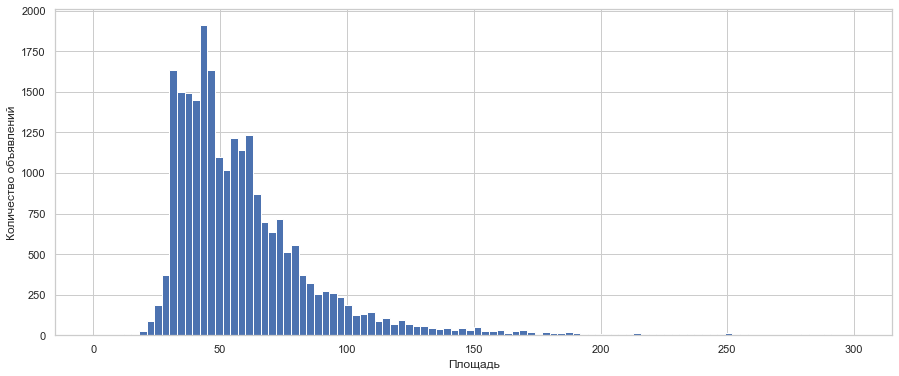

In [34]:
sns.set_theme(style="whitegrid")
data_compact['total_area'].hist(bins=100, range = (0, 300), figsize=(15, 6))
plt.xlabel('Площадь'), plt.ylabel('Количество объявлений')
plt.show() 

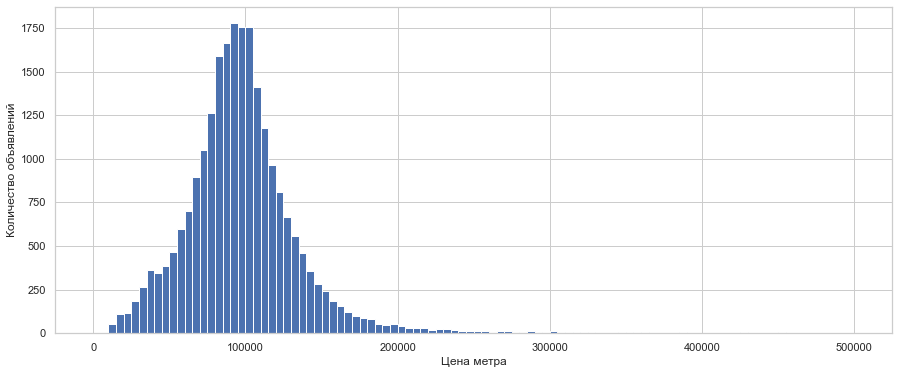

In [35]:
data_compact['price_per_m'].hist(bins=100, range = (0, 500000), figsize=(15, 6))
plt.xlabel('Цена метра'), plt.ylabel('Количество объявлений')
plt.show() 

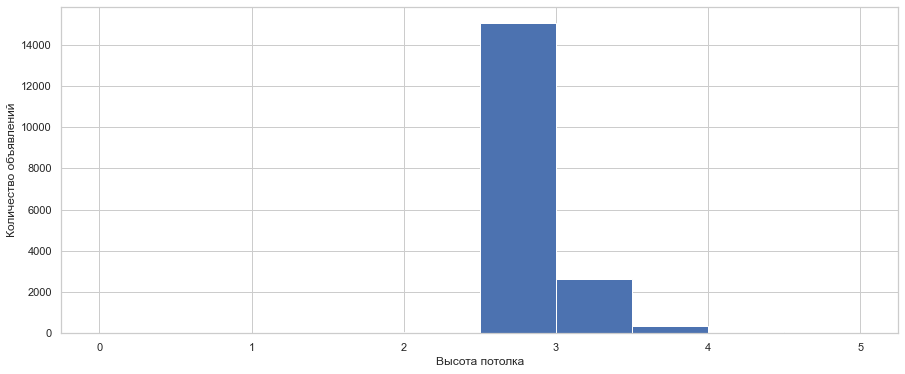

In [36]:
data_compact['ceiling_height'].hist(bins=10, range = (0, 5), figsize=(15, 6))
plt.xlabel('Высота потолка'), plt.ylabel('Количество объявлений')
plt.show() 

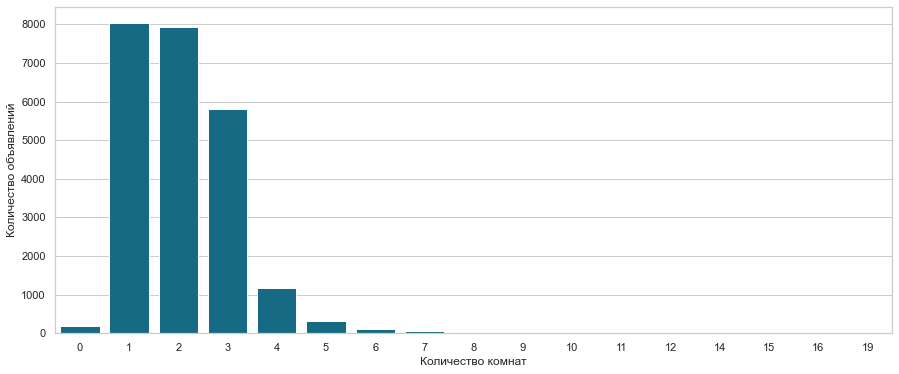

In [37]:
plt.figure(figsize=(15, 6))
sns.countplot(data=data_compact, x='rooms', color='xkcd:sea blue')
plt.xlabel('Количество комнат'), plt.ylabel('Количество объявлений')
plt.show() 

### Вывод

Гистограмма площади показывает, что основной пик приходится на площадь меньше 50 кв.метров, после 200 кв. метров значений становится совсем мало. Чем больше общая площадь квартиры, тем реже они встречаются в объявлениях о продаже. Таких квартир действительно немного, поэтому сможем позже избавиться от них как от аномальных значений. 

На гистограмме стоимости квадратного метра перед нами нормальное распределение: цена за метр постоянно возрастает пока не достигает пика около 100 000 рублей. Квартиры с более высоким ценником за метр встречаются значительно реже, а дороже 300 000 рублей за метр совсем редко.

Гистограмма высоты потолка выглядит ожидаемо, ведь мы уже убрали из этого столбца выбивающиеся значения. График соответствует выбранному диапазону 2,2 - 6 метров. Пик в середине графика обусловлен заполнением пропусков.

На графике видно, что на рынке преобладают однокомнатные и двухкомнатные квартиры. Выделяются чуть меньшим числом трех- и четырехкомнатные. На пятикомнатных квартирах график практически сходит на нет, равно как и на студиях.

### 4.2 Время продажи

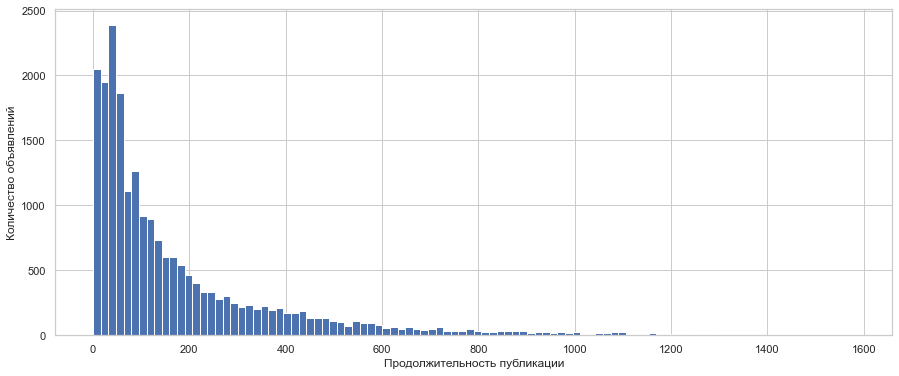

In [38]:
data_compact['days_exposition'].hist(bins=100, figsize=(15, 6))
plt.xlabel('Продолжительность публикации'), plt.ylabel('Количество объявлений')
plt.show() 

На графике длительности продажи мы наблюдаем высокие пики и резкие выбросы в диапазоне от 0 до 100. Также очевидно, что разброс значений очень большой. Чтобы знать, где мы имеем дело с аномалиями, построим "ящик с усами".

count    21389.000000
mean       181.694118
std        219.541280
min          1.000000
25%         45.000000
50%         97.000000
75%        233.000000
max       1580.000000
Name: days_exposition, dtype: float64

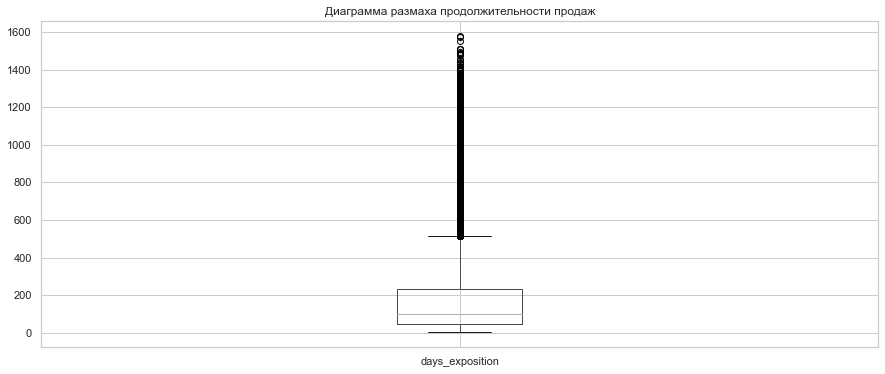

In [39]:
display(data_compact['days_exposition'].describe())
plt.figure(figsize=(15, 6))                                            
data_compact.boxplot(column='days_exposition', figsize=(15, 6))                                
plt.title('Диаграмма размаха продолжительности продаж')
plt.show()

Медиана столбца составляет 97 дней, а среднее время продажи 181 день. По диаграмме размаха увидим, что большинство продаж укладывается в диапазон от 0 до 500 дней. Следовательно, квартиры, которые "провисели" в продаже более 1,5 лет признаем выбросами (365 x 1,5 ~ 550) и удалим их.

In [40]:
data_compact = data_compact.query('days_exposition <= 550')

Чтобы узнать, какие продажи можно считать экстремально быстрыми, предположим, что объявления, которые закрылись быстрее, чем 90% остальных - аномалии. Следовательно, рассчитаем 10 перцентиль.

In [41]:
np.percentile(data_compact['days_exposition'], 10) 

16.0

Сделки, закрытые в течение 2 недель, можно считать экстремально быстрыми.

In [42]:
data_compact = data_compact.query('days_exposition > 14')

Рассмотрим, сколько занимает процесс продажи квартиры. Возьмем период в полгода.

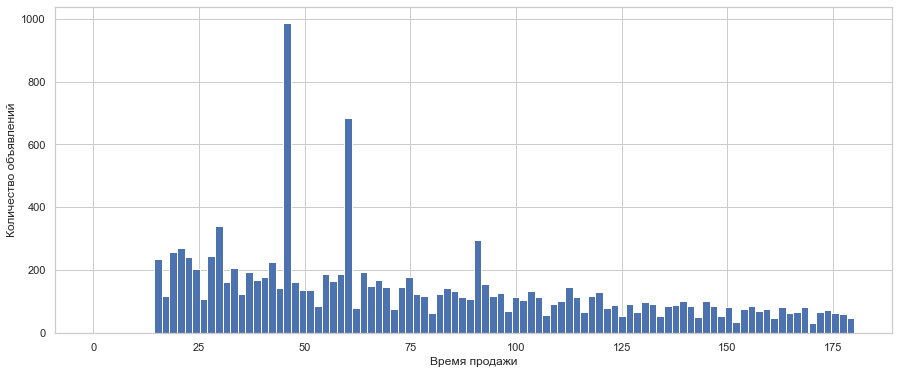

In [43]:
data_compact['days_exposition'].hist(bins=100, range = (0, 180), figsize=(15, 6))
plt.xlabel('Время продажи'), plt.ylabel('Количество объявлений')
plt.show()

Обращают на себя внимание пики на отметках в 30, 45, 60 и 90 дней. Вероятно, сервис напоминает продавцам о том, что объявление все еще открыто. Те, кто к этому моменту квартиру уже продал, но не удалил его, делает это после напоминания.

По дате публикации видно, что в столбце `days_exposition` посчитаны дни от публикации до 3 мая 2019 года, которым ограничен наш датасет. Чтобы сохранить объективность данных, стоит избавится от объявлений, которые были опубликованы позже конца апреля 2019 года. Заодно отбросим значения больше полутора лет, которые мы признали аномалиями.

In [44]:
data_compact.describe()

,price_per_m,total_area,weekday,month,year,days_exposition,rooms,ceiling_height,city_center_nearest
count,1.805600e+04,18056.000000,18056.000000,18056.000000,18056.000000,18056.000000,18056.000000,13776.000000,14028.000000
mean,9.846855e+04,58.832059,2.585346,6.520547,2017.335456,146.739809,2.023039,2.716284,14477.514899
std,4.760092e+04,33.158855,1.789667,3.476808,0.883999,127.972914,1.035841,0.250335,8535.293292
min,7.962960e+03,12.000000,0.000000,1.000000,2014.000000,14.500000,0.000000,2.000000,208.000000
25%,7.692308e+04,39.900000,1.000000,3.000000,2017.000000,48.000000,1.000000,2.550000,9721.750000
50%,9.469697e+04,51.000000,3.000000,7.000000,2017.000000,99.000000,2.000000,2.650000,13277.000000
75%,1.130510e+05,68.000000,4.000000,10.000000,2018.000000,204.625000,3.000000,2.800000,16502.000000
max,1.907500e+06,900.000000,6.000000,12.000000,2019.000000,550.000000,19.000000,6.000000,64857.000000


### Вывод

Таким образом, мы пришли к выводу, что сверхкороткие продажи - это те, которые длились 2 недели и меньше. Сверхдолгие продажи - это те, которые заняли более 1,5 лет (550 дней). Мы отфильтровали такие строки и перезаписали датафрейм.

Стоит обратить внимание, что в результате среднее в столбце `days_exposition` сильно изменилось. Оно снизилось со 180 до 147 дней, а медиана, наоборот, чуть-чуть выросла  - с 97 до 99. Объем данных все еще остается достаточно большим для анализа (более 18 000 объявлений). Таким образом, видим, что продажа квартиры обычно занимает 2-3 месяца, в редких случаях более полугода.

### 4.3 Аномальные значения

При построении гистограмм мы видели, что многие параметры имеют аномально высокие значения, которые мешают объективно взглянуть на данные. Попробуем избавиться от них и построить диаграммы размаха, опираясь на гистограммы из п.5.1.

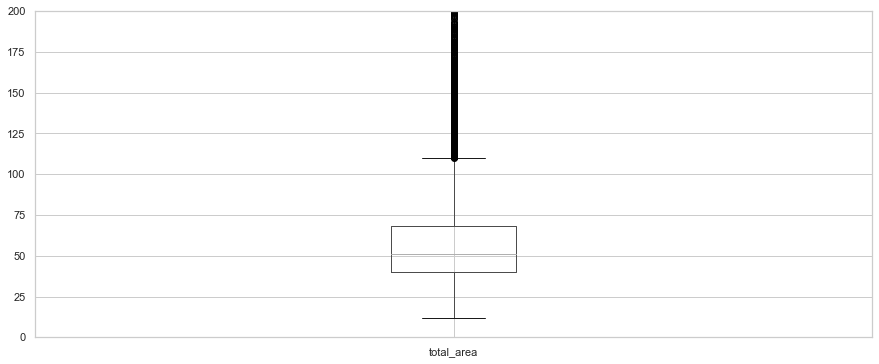

In [45]:
plt.figure(figsize=(15, 6))    
plt.ylim(0, 200)                             # ранее мы видели, что гистограмма площади сходила на нет на отметке в 200 метров
data_compact.boxplot(column='total_area')
plt.show()

Основная масса значений начинается от 15 кв. метров и заканчивается на отметке в 110 метров. Выше следуют аномально большие квартиры. Узнаем, сколько таких квартир и как сильно вырастает их стоимость по сравнению с большинством объявлений.

In [46]:
len(data_compact.query('total_area < 15 or total_area > 115')) # даже если мы откажемся от такого количества квартир, это 
                                                               # не сильно повлияет на данные

775

Для диаграммы размаха стоимости квадратного метра ограничим ее значения на отметке в 250 000 рублей за метр в соответствии с гистограммой.

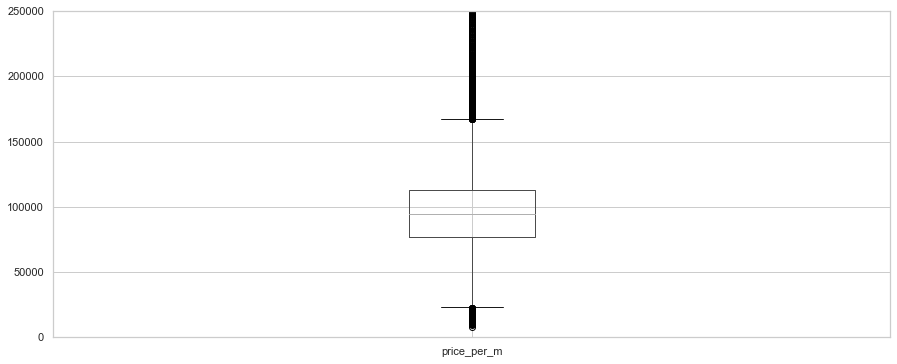

In [47]:
plt.figure(figsize=(15, 6))
plt.ylim(0, 250000)          
data_compact.boxplot(column='price_per_m')
plt.show() 

Диаграмма размаха показывает нам, что при выборке можно не учитывать значения меньше 25 000 и больше 175 000 за метр. Посмотрим на эти значения подробнее.

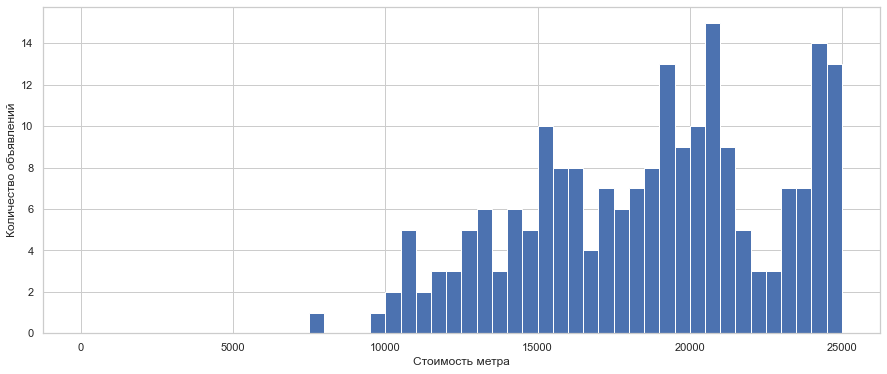

In [48]:
data_compact['price_per_m'].hist(bins=50, range = (0, 25000), figsize=(15, 6))
plt.xlabel('Стоимость метра')
plt.ylabel('Количество объявлений')
plt.show() 

На этом графике видим, что в таблице существуют и значения возле 0 и меньше 10 000 (что совсем неправдоподобно). Посмотрим, где располагается такое жилье:

In [49]:
data_compact.query('0 <= price_per_m <= 25000').head(10)

,price_per_m,total_area,locality_name,first_day_exposition,weekday,month,year,days_exposition,rooms,ceiling_height,city_center_nearest,floors_grouped
164,19851.12,40.3,поселок Ефимовский,2018-06-25,0,6,2018,81.0,2,NaN,NaN,первый
170,19047.62,73.5,поселок Торковичи,2018-03-31,5,3,2018,276.0,3,2.6,NaN,последний
247,20967.74,31.0,Сланцы,2017-01-20,4,1,2017,378.0,1,NaN,NaN,первый
268,14130.43,46.0,Сланцы,2018-03-15,3,3,2018,75.0,2,2.5,NaN,последний
293,21028.04,42.8,Сясьстрой,2017-06-14,2,6,2017,247.0,2,NaN,NaN,последний
382,24324.32,37.0,Сланцы,2018-02-01,3,2,2018,38.0,1,NaN,NaN,другой
431,24285.71,70.0,Луга,2017-12-04,0,12,2017,419.0,3,3.0,NaN,другой
487,19877.68,65.4,поселок Оредеж,2018-11-04,6,11,2018,45.0,3,2.5,NaN,другой
606,20466.32,38.6,поселок Синявино,2018-04-03,1,4,2018,374.0,2,3.0,NaN,первый
764,21590.91,44.0,Бокситогорск,2018-05-05,5,5,2018,156.0,2,NaN,NaN,другой


Очевидно, что низкий ценник объясняется отдаленностью от Санкт-Петербурга, то есть эти значения нельзя признать аномалиями. Значит, при выборе минимального допустимого значения можем полагаться на диаграмму размаха.

Что касается аномально дорогих квартир, то посмотрим, как они зависят от площади. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


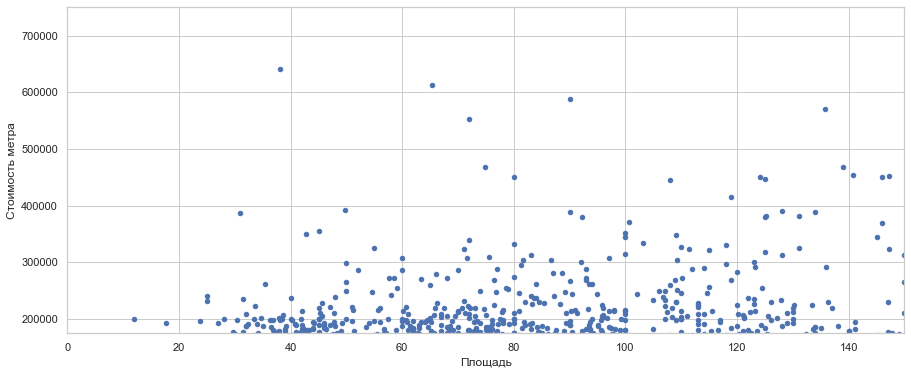

In [50]:
data_compact.plot(x='total_area', y='price_per_m', kind='scatter', 
                  xlim=(0, 150), ylim=(175000, 750000), grid=True, figsize=(15, 6))
plt.xlabel('Площадь')
plt.ylabel('Стоимость метра')
plt.show() 

С удивлением обнаружим, что высокий ценник встречается в самых разных квартирах (чаще всего в диапазоне от 30 до 100 кв. метров), но обычно все таки не поднимается выше 200 000 рублей за метр. Таким образом, диаграмма размаха соответствует истине. Для выборки мы возьмем квартиры не дешевле 25 000 за метр и не дороже 175 000 за метр.

Что касается высоты потолков, то мы уже смотрели на разброс значений для этого параметра, когда избавлялись от пропусков. Он составляет 2,2 - 4,5 метров. Осталось проверить разброс значений по комнатам: по данным о датасете в продаже есть квартиры со значением от 0 до 19. Проверим, насколько эта информация достоверна.

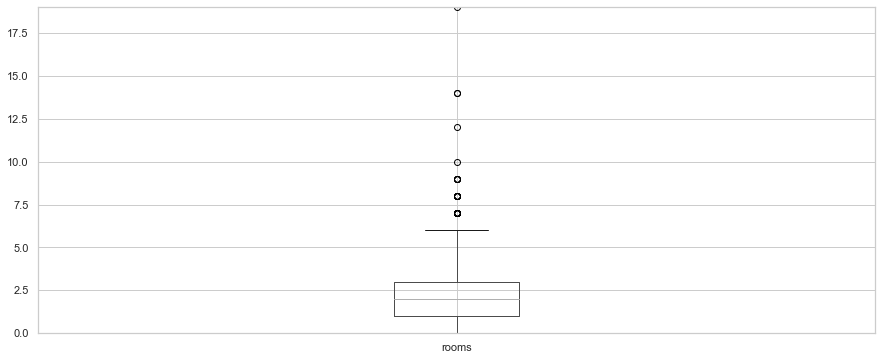

In [51]:
plt.figure(figsize=(15, 6))
plt.ylim(0, 19)          
data_compact.boxplot(column='rooms')
plt.show()

Диаграмма размаха дает нам возможность отсечь квартиры, где более 6 комнат. Ноль выбрасывать из выборки не будем, поскольку так помечены студии - распространенный формат жилья на рынке.

Таким образом, из большого датасета мы возьмем для анализа строки, которые отвечают следующим условиям:
- высота потолков от 2,2 до 4,5 метров;
- продолжительность размещения от 15 до 550 дней (уже отсеяны);
- количество комнат от 0 до 6;
- общая площадь от 15 до 115 кв. метров;
- цена за метр от 25 000 до 175 000 рублей.

In [52]:
data_compact = data_compact.query('2.2 <= ceiling_height <= 4.5 & rooms <= 6 & 15 <= total_area <= 115 & 25000 <= price_per_m <= 175000')
data_compact.describe()

,price_per_m,total_area,weekday,month,year,days_exposition,rooms,ceiling_height,city_center_nearest
count,12721.000000,12721.000000,12721.000000,12721.000000,12721.000000,12721.00000,12721.000000,12721.000000,10790.000000
mean,97059.431598,54.401946,2.556403,6.492021,2017.395488,146.77942,1.936640,2.689924,15016.675904
std,26763.219332,19.233573,1.787399,3.477414,0.873676,127.45991,0.893853,0.214846,8198.867217
min,25000.000000,15.000000,0.000000,1.000000,2014.000000,14.50000,0.000000,2.200000,208.000000
25%,80365.850000,39.700000,1.000000,3.000000,2017.000000,50.00000,1.000000,2.540000,10853.750000
50%,96666.670000,50.100000,3.000000,7.000000,2017.000000,100.00000,2.000000,2.650000,13745.000000
75%,113356.010000,65.500000,4.000000,10.000000,2018.000000,204.00000,3.000000,2.750000,16685.000000
max,174932.610000,115.000000,6.000000,12.000000,2019.000000,550.00000,6.000000,4.500000,64857.000000


### Вывод

Таким образом, с помощью гистограмм, диаграмм размаха и диаграмм рассеяния удалось отсеять редкие и выбивающиеся значения. Мы уже успели сделать некоторые выводы:

1) Удалось выявить сроки наиболее частых закрытий объявлений (30, 45, 60 и 90 дней). Есть гипотеза, что это происходит автоматически или благодаря напоминаниям от сервиса.

2) В таблице представлены очень большие квартиры (площадью более 200 кв. метров или более 10 комнат), но при этом стоимость квадратного метра для них все равно держится ближе к отметке 100 000 рублей за метр. Есть и совершенно неправдоподобные данные (например, квартира 900 кв. метров). Мы приняли решение избавиться от них.

3) Основную долю на рынке удерживают 1- и 2-комнатные квартиры, чуть отстают от них по востребованности трехкомнатные. Зато студий вопреки ожиданиям продается не так много.

4) Высота потолков в квартирах, как правило, различается незначительно. Редко в советском или современном жилье встречаются потолки выше 3 метров. Но здесь мы расширили диапазон допустимых значений, так как в Петербурге жилье может относиться к дореволюционной постройке, а значит иметь нетипичную высоту потолка.

6) Что касается стоимости квадратного метра, то ее необходимо было ограничить: разброс цен изначально достигал невероятных размеров от 100 рублей до почти 2 миллионов за метр. Такие невероятные цифры всегда внушают подозрения: либо хозяин был совершенно невнимателен при заполнении полей, либо мы имеем дело с мошенничеством. И в том, и в другом случае настолько неправдоподобные данные надо отбрасывать.

По результатам была создана таблица отфильтрованных данных, где распределение близко к нормальному. Поэтому они пригодны для анализа и построения общих выводов.

### 4.4 Взаимосвязь данных

Для нахождения взаимосвязи между параметрами таблицы и ценой квадратного метра создадим таблицу и построим по ней матрицу диаграмм рассеяния.

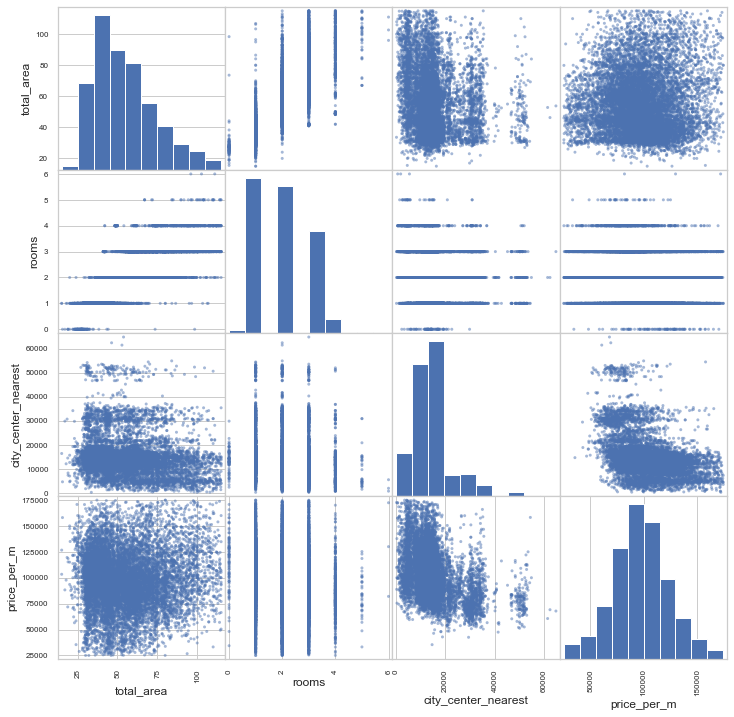

In [53]:
data_compact_short = data_compact[['total_area', 'rooms', 'city_center_nearest', 'price_per_m']]
pd.plotting.scatter_matrix(data_compact_short, figsize=(12, 12))
plt.show()

В верхнем левом углу гистограмма общей площади. Когда отброшены аномалии, четко видно, что лидируют площади около 50 метров. 

Диаграмма снизу отражает связь количества комнат и площади: логично, что чем меньше комнат в квартире, тем меньше ее площадь. Поэтому с возрастанием количества комнат, график смещается вправо. 

Третья сверху диаграмма - связь отдаленности от центра и площади: заметим, что в центре практически нет маленьких квартир (площадь начинается от 30 кв. метров), в 20 км от центра площади квартир не превышают 100 кв.метров, а также наблюдается пробел в данных на расстоянии 40-50 км от центра.

В нижнем левом углу можем наблюдать зависимость цены квадратного метра от площади, но пока значения сливаются между собой. Необходимо выбрать другую форму представления данных.

На диаграмме `rooms - city_center_nearest` видно, что квартиры с 1,2 и 3 комнатами представлены практически везде. Студии практически не встречаются в пригородах, а крупные квартиры (5 и 6 комнат) концентрируются максимально близко к центру Санкт-Петербурга.

На графике `rooms - price_per_m` видно, что у самых распространеннных квартир - самый большой разброс по цене: они представлены во всех ценовых категориях. Цены на студии и четырехкомнатные квартиры, наоборот, имеют ограниченный диапазон: на студии от 50 000 до 150 000 рублей за метр, на четырехкомнатные от 30 000 до 150 000 за метр. Шестикомнатные больше стремятся в верхнюю половину графика.

График `city_center_nearest - price_per_m` показывает, что поблизости от центра цена редко опускается ниже 80 000 за метр, а верхний предел может быть любым в выбранных нами значениях. Ситуация кардинально меняется на отметке в 20 км от центра: ценник резко падает до 120 000 за метр, а после 50 км сохраняется в диапазоне от 60 до 100 тысяч за метр.

Посмотрим на корреляцию столбцов между собой:

In [54]:
data_compact_short.corrwith(data_compact_short['price_per_m'], axis=0) # посчитаем коэффициент корреляции Пирсона для столбцов

total_area             0.026644
rooms                 -0.180775
city_center_nearest   -0.401210
price_per_m            1.000000
dtype: float64

Четкая связь, как и ожидалось, заметна между площадью и количеством комнат, а менее очевидная - между ценой метра и расстоянием до центра. Еще на матрице диаграмм рассеяния мы обратили внимание, что данных относительно площади и цены метра очень много: они сливаются и не позволяют увидеть закономерности. Выберем другую форму визуализации.

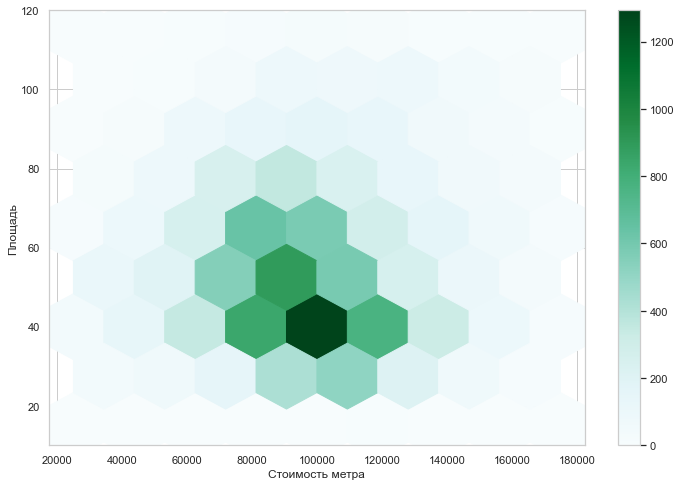

In [55]:
data_compact.plot(x='price_per_m', y='total_area', kind='hexbin', gridsize=8, figsize=(12, 8), sharex=False, grid=True)
# используем гексограмму: она покажет, каких объявлений больше всего
plt.xlabel('Стоимость метра')
plt.ylabel('Площадь')
plt.show() 

На этом графике уже лучше видно, что основная масса квартир имеет площадь менее 80 кв. метров, а больше всего представлено на рынке жилье площадью около 50 кв. метров. Цена при этом часто стремится к отметке 100 000 рублей за квадратный метр, но есть интересная особенность: чем больше площадь, тем дешевле цена квадратного метра  жилья. Для квартир площадью 20-40 кв. метров ценник может достигать 120-130 тыс. рублей за метр. Для квартир площадью 40-60 кв. метров разброс цен укладывается в диапазон 70-115 тыс. за метр. Для квартир площадью 60-80 метров разброс достигает 80-100 тыс. за метр.

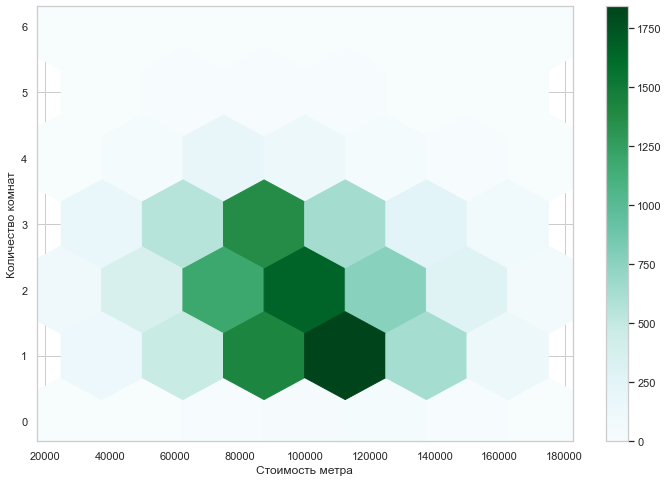

,price_per_m
rooms,
0,114331.576947
1,102413.948282
2,95905.881053
3,91634.029811
4,86640.114674
5,83481.651111
6,128125.936667


In [56]:
data_compact.plot(x='price_per_m', y='rooms', kind='hexbin', gridsize=6, figsize=(12, 8), sharex=False, grid=True)
# проверим эти выводы относительно зависимости цены и количества комнат
plt.xlabel('Стоимость метра')
plt.ylabel('Количество комнат')
plt.show() 
data_compact.pivot_table(index = 'rooms', values = 'price_per_m') # выведем также средние цены, чтобы цифры были видны яснее

Аналогичную зависимость подтверждает и взаимосвязь цены и количества комнат: ценник метра стабильно снижается с увеличением числа комнат. Но для 6-комнатных квартир стоимость вновь подрастает до 130 тыс. за метр: возможно, здесь мы имеем дело с элитным жильем.

Рассмотрим поближе зависимость цены и расстояния до центра города. На графике заметно несколько участков. В первую очередь обращает на себя внимание "хвост" в нижней правой части: самые высокие цены именно вблизи от центра города, на расстоянии 10 км минимум составляет 80 тыс. рублей, а максимум около 160 тыс. Если сделать еще шаг от центра на 10 км, то минимум снизится до 60 тыс. за метр. На границе 20 км проходит какая-то условная граница, после которой резко становится меньше квартир и разброс цен сокращается до 60-100 тыс. рублей. Наконец, на расстоянии 50 км от центра Петербурга квартир сосем мало, да и цены на них несравнимо меньше городских. Мы помним, что небольшую часть датасета занимало жилье в Ленинградской области: очевидно, что это фрагмент данных оттуда.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='price_per_m', ylabel='city_center_nearest'>

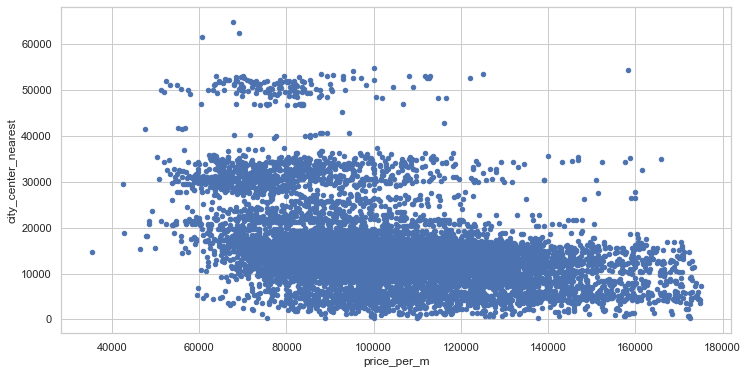

In [57]:
data_compact.plot(x='price_per_m', y='city_center_nearest', kind='scatter', figsize=(12, 6), grid=True)
# график из матрицы диаграмм рассеяния, но крупнее

Теперь изучим, как цена связана с этажом, на котором располагается квартира:

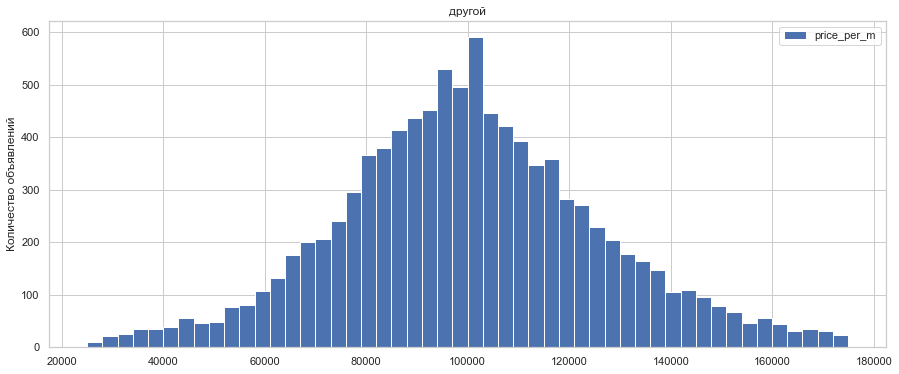

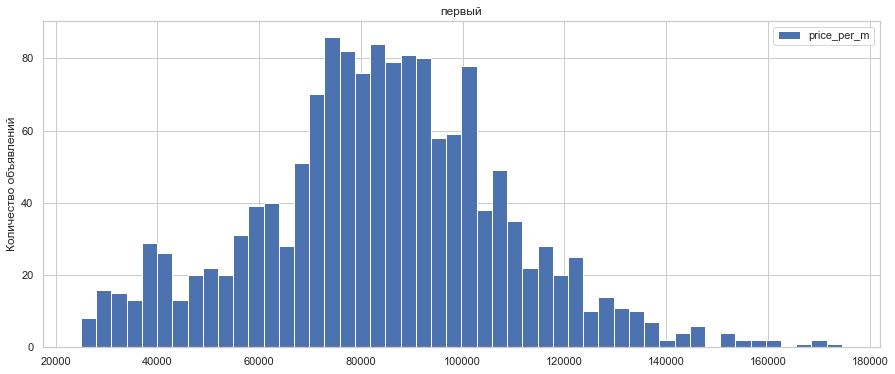

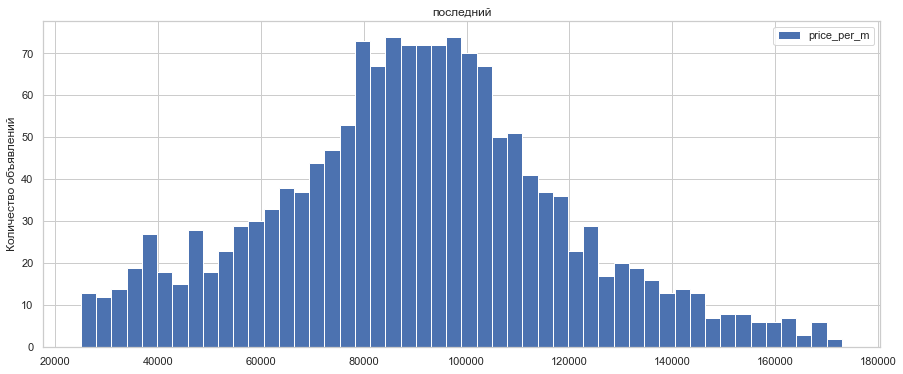

price_per_m               
                     count           mean
floors_grouped                           
другой                9651  100238.167361
первый                1499   83990.551441
последний             1571   90001.680172

In [58]:
for name, group_data in data_compact.groupby('floors_grouped'):                       # цикл перебирает каждую группу в столбце
                                                                                      # и строит гистограмму для нее отдельно
    group_data.plot(y='price_per_m', title=name, kind='hist', bins=50, figsize=(15, 6))
    plt.ylabel('Количество объявлений')
    plt.show()
    
display(data_compact.groupby('floors_grouped').agg({'price_per_m': ['count', 'mean']}))  # выведем также средние цены по этажам

На первой диаграмме видно нормальное распределение: график симметричный, пики сосредоточены у отметки в 100 тыс. Два других графика далеки от симметрии, ведь там намного меньше данных. Цена метра сдвинута влево, то есть меньше, чем для "других". Больше всего это заметно для первого этажа. Выводы подтверждаются и сводной таблицей в конце.

Чтобы увидеть, как цена зависит от даты публикации, создадим функцию, которая будет строить соответствующий график. Помня о разном количестве данных для этажей, постараемся учесть количество нужных строк и сейчас.

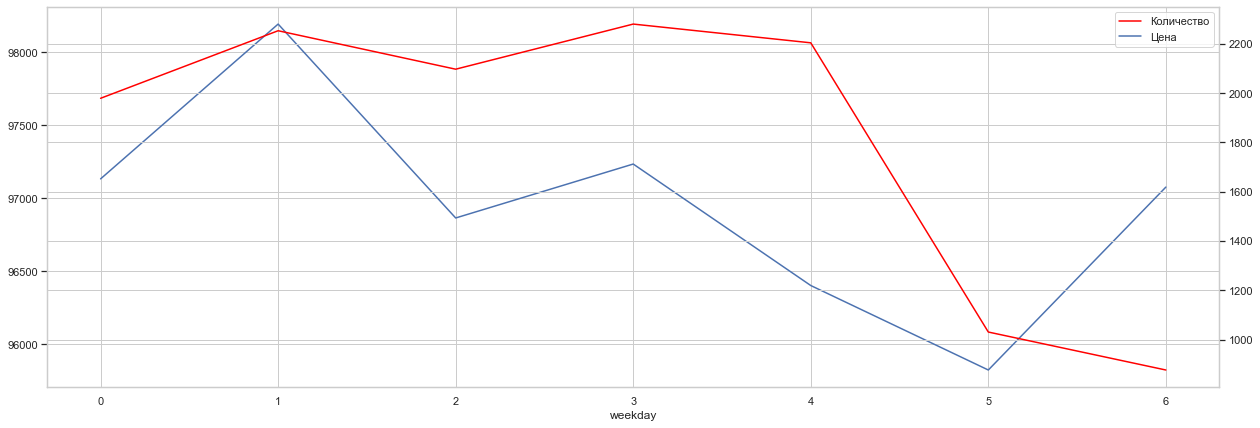

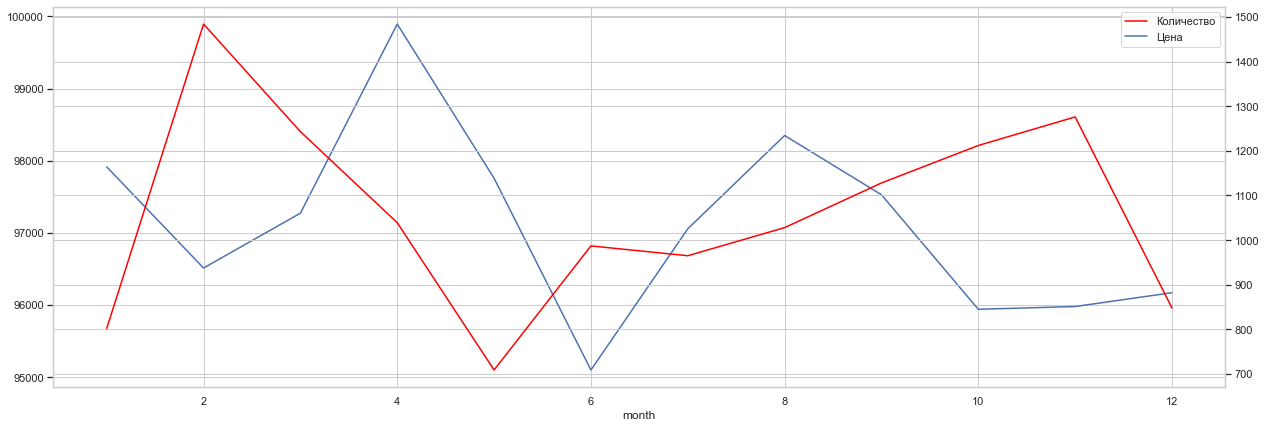

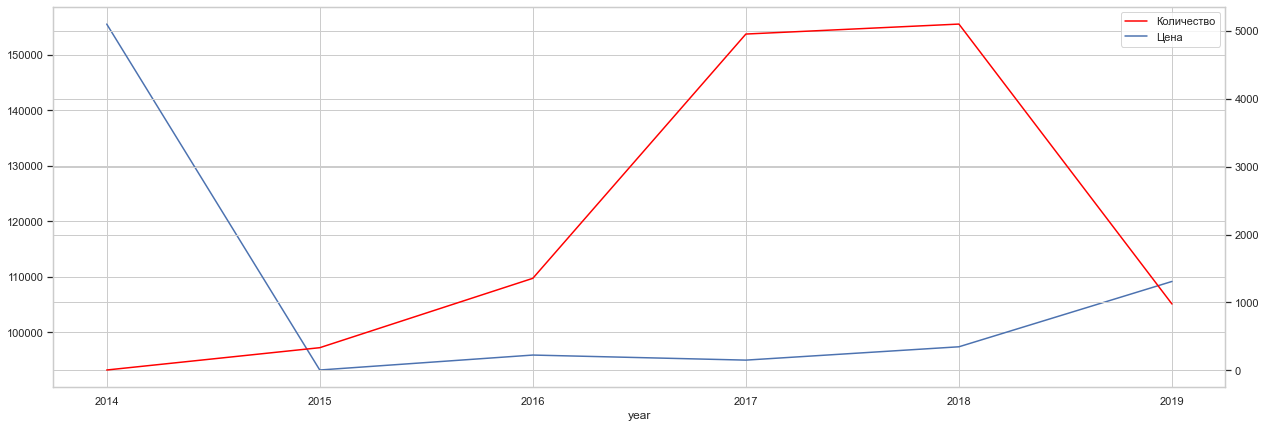

In [72]:
def build_plots(df, columns): 
    for column in columns:                                                                 
        part_plot = (df.groupby(column)                                   # сгруппируем данные по этому столбцу
                     .agg({'rooms': 'count', 'price_per_m': 'mean'})      # посчитаем количество строк и среднюю цену
                     .rename(columns = {'rooms': 'Количество'})           # чтобы не запутаться, назовем счетчик строк правильно
                    )
        ax1 = part_plot['price_per_m'].plot(figsize = (21, 7), grid=True, label='Цена') 
                                                                          # построим график цены для этой группы
        
        ax2 = part_plot['Количество'].plot(figsize = (21, 7), ax=ax1.twinx(), color='red', label='Количество') 
                                                                          # выведем количество объявлений
        

        lns = ax2.get_lines() + ax1.get_lines()
        labs = [l.get_label() for l in lns]
        plt.legend(lns, labs, loc=0)
        plt.show()
        
build_plots(data_compact, ['weekday', 'month', 'year'])                   # применим функцию

Больше всего объявлений публикуется на буднях: в начале недели средняя цена метра выше, чем в четверг, хотя количество публикаций остается стабильным. А вот с пятницы подача заявок стремительно падает, что объясняет и уменьшение средней стоимости. Вероятно, продавцы доверяют публикацию агентам или предпочитают выполнять такие серьезные задачи, как продажа квартиры, в рабочие дни. 

Схожая ситуация складывается и по месяцам: резкое падение в мае связано с тем, что на этом месте обрывается датасет, поэтому падение цены - не закономерность. Однако к июню количество объявлений все еще остается маленьким, как и ценник. Зато вызывают интерес пики цены в феврале и августе: вероятно, после летнего и новогоднего затишья рынок снова оживает.

График по годам самый стабильный. По нему мы можем сказать, что средняя цена метра в Петербурге постоянно растет: в 2015-2017 годах плавно, а с 2017 - резко. Количество объявлений потверждает эти выводы, хотя с 2018 начинает падать. Резкое уменьшение публикаций в 2019 связано с тем, что у нас нет всех данных за этот год.

### Вывод

На стоимость квартиры сильно влияет ее площадь и количество комнат, между собой эти два параметра также прочно взаимосвязаны. Самые востребованные квартиры (однокомнатные) обходятся дороже всего. Чем больше площадь квартиры и количество комнат, тем дешевле становится квадратный метр. Резкий рост ценообразования происходит для шестикомнатных квартир, где мы, вероятно, вступаем в сегмент элитного жилья.

Цена в немалой мере определяется и удаленностью от центра Петербурга. Поблизости от центра даже минимальные цены на жилье значительно выше, а также шире их разброс. Только на отметке в 20 км цена метра падает на несколько десятков тысяч. Чем дальше в область, тем меньше разнообразного жилья, а диапазон цен становится уже.

Цену снижает и расположение квартиры на первых и последних этажах: цена падает в среднем на 10 тыс. за метр.

С годами средний ценник на квартиры в Петербурге растет. В течение года дороже всего продается недвижимость в феврале и августе, а новые объекты появляются на рынке преимущественно в будние дни. Интересно, что по четвергам наблюдается небольшое снижение цены.

### 10 населенных пунктов

In [60]:
cities = data_compact['locality_name'].value_counts().head(10)                # 10 городов с наибольшим количеством объявлений
cities

Санкт-Петербург      9238
поселок Шушары        281
поселок Парголово     242
Колпино               217
Пушкин                203
Всеволожск            190
Мурино                181
Кудрово               132
Петергоф              127
Сестрорецк            120
Name: locality_name, dtype: int64

In [61]:
(data_compact.query('locality_name in @cities.index')                         # возьмем срез по этим названиям
.pivot_table(index = 'locality_name', values = 'price_per_m')                 # по срезу - сводную таблицу со средними ценами
 .sort_values(by='price_per_m', ascending=False)
)

,price_per_m
locality_name,
Санкт-Петербург,106377.294501
Сестрорецк,102668.362083
Пушкин,99682.360542
Кудрово,95611.873561
поселок Парголово,90401.371694
Мурино,86712.969558
Петергоф,84217.858189
поселок Шушары,78945.570463
Колпино,74571.017373


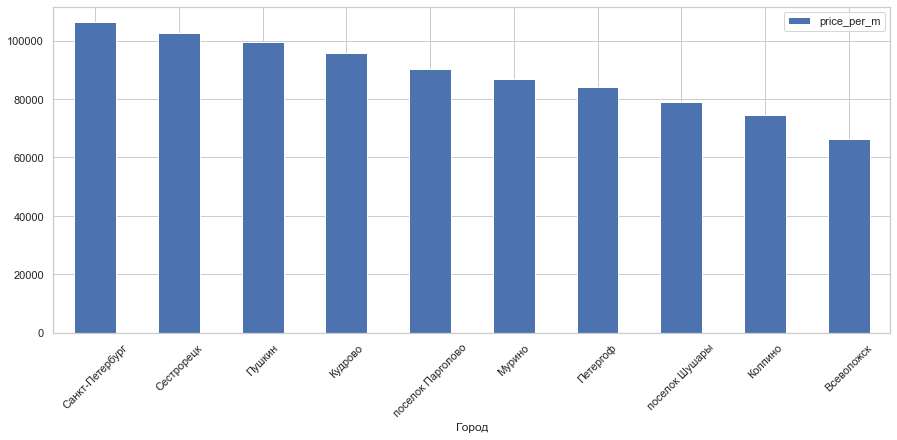

In [62]:
(data_compact.query('locality_name in @cities.index')
.pivot_table(index = 'locality_name', values = 'price_per_m') 
 .sort_values(by='price_per_m', ascending=False) 
 .plot(kind='bar', figsize=(15, 6))                                           # добавим график для наглядности
)

plt.xlabel('Город'), plt.xticks(rotation = 45)
plt.show()

### Вывод

Ожидаемо, самая высокая стоимость квадратного метра оказалась в Санкт-Петербурге, незначительно отстает от него Пушкин. Последнее место с самым низким ценником в десятке занимает Выборг. Средняя цена падает со 110 тыс. до 60 тыс. за кв. метр.

### Расстояние до центра

In [63]:
only_city = data_compact.query('locality_name == "Санкт-Петербург"')               # выберем все квартиры в СПб
only_city.isna().sum()                                                             # проверим пропуски

price_per_m             0
total_area              0
locality_name           0
first_day_exposition    0
weekday                 0
month                   0
year                    0
days_exposition         0
rooms                   0
ceiling_height          0
city_center_nearest     9
floors_grouped          0
dtype: int64

In [64]:
only_city = only_city.dropna(subset=['city_center_nearest'])                            # и избавимся от них
only_city.isna().sum() 
only_city['km_to_center'] = (only_city['city_center_nearest'] / 1000).astype('int')     # добавим новый столбец,
                                                                                        # округлив до целых чисел

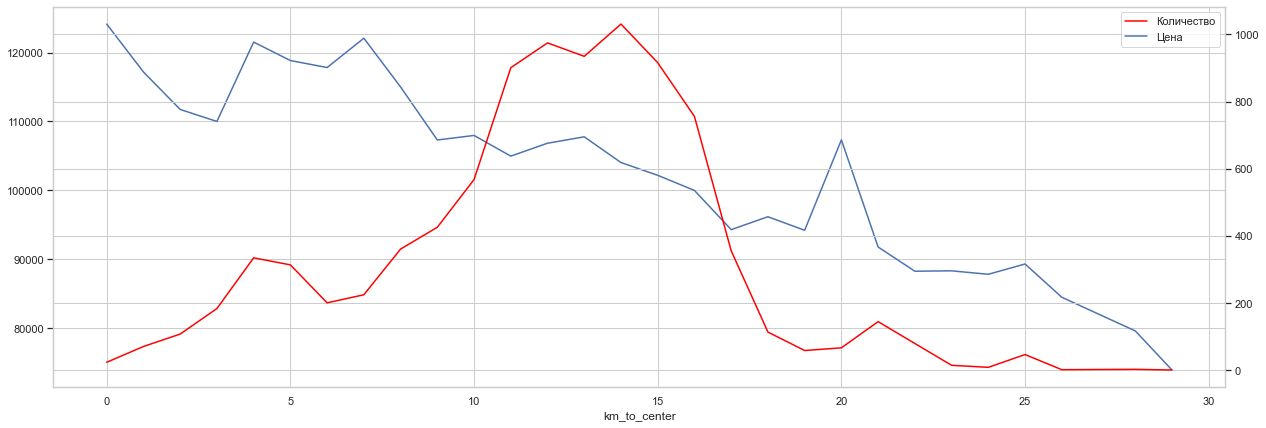

In [73]:
build_plots(only_city, ['km_to_center']) # применим функцию, чтобы построить график с учетом количества объявлений

### Вывод

Меньше всего объявлений о продаже в самом центре Петербурга и после 17-го километра. Недостаток первых, вероятно, связан с тем, что мало кто расстается с ценной недвижимостью. На отметке около 7 км видим, что цена за метр начинает медленно снижаться, тогда как количество объявлений, наоборот, растет. Предположим, что именно здесь заканчивается центр города: предложений становится больше, но недвижимость уже теряет в цене.

### Квартиры в центре

In [80]:
only_city_center = only_city[only_city['km_to_center'] <=7]                        # выделим квартиры в центре
outskirts = only_city[only_city['km_to_center'] > 7]
only_city_center.describe()

,price_per_m,total_area,weekday,month,year,days_exposition,rooms,ceiling_height,city_center_nearest,km_to_center
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,118178.259446,68.457544,2.494528,6.646375,2017.277702,163.699384,2.374829,2.965581,4961.638167,4.466484
std,24967.231300,22.207172,1.724220,3.417571,0.891535,133.631927,0.963607,0.330044,1751.085956,1.747954
min,59523.810000,15.500000,0.000000,1.000000,2015.000000,15.000000,0.000000,2.400000,208.000000,0.000000
25%,99375.970000,50.000000,1.000000,3.000000,2017.000000,60.000000,2.000000,2.710000,3867.000000,3.000000
50%,115951.610000,67.950000,2.000000,7.000000,2017.000000,117.000000,2.000000,3.000000,5029.000000,5.000000
75%,136442.835000,85.100000,4.000000,10.000000,2018.000000,237.000000,3.000000,3.167500,6213.250000,6.000000
max,174932.610000,115.000000,6.000000,12.000000,2019.000000,549.000000,6.000000,4.370000,7997.000000,7.000000


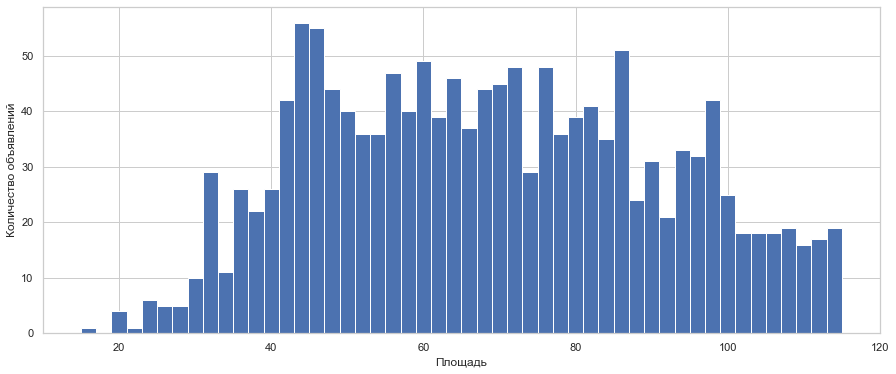

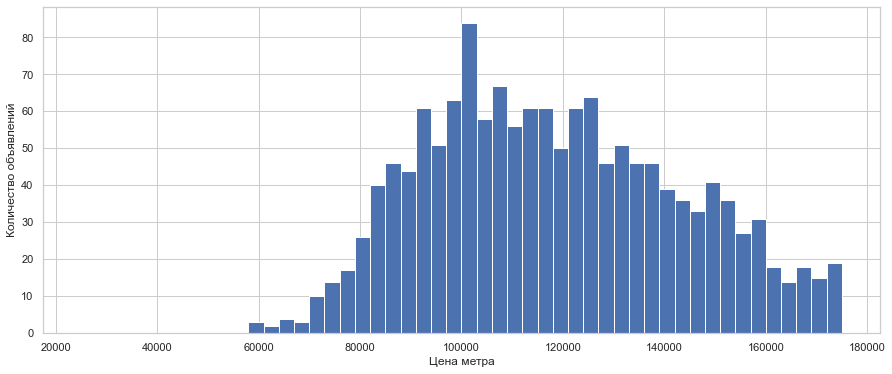

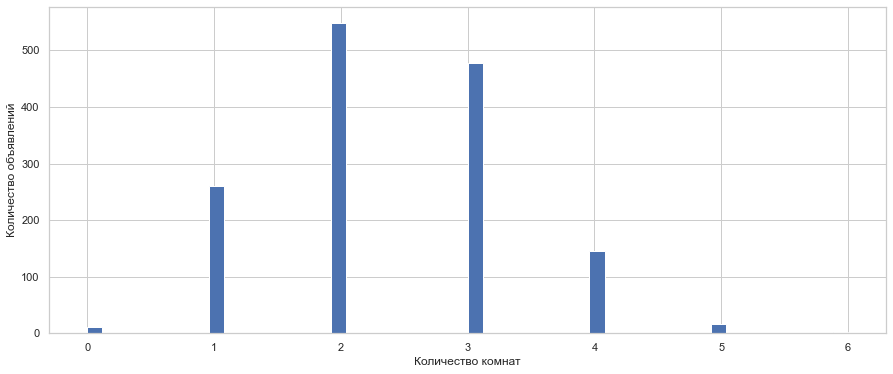

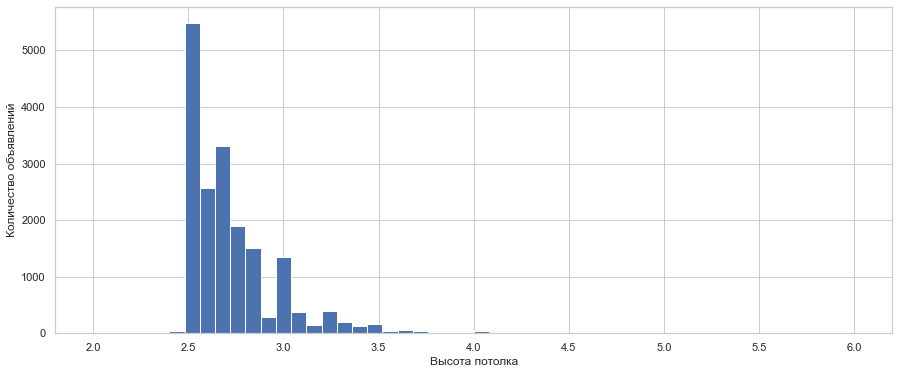

In [88]:
only_city_center['total_area'].hist(bins=50, range = (15, 115), figsize=(15, 6))
plt.xlabel('Площадь'), plt.ylabel('Количество объявлений')
plt.show() 

only_city_center['price_per_m'].hist(bins=50, range = (25000, 175000), figsize=(15, 6))
plt.xlabel('Цена метра'), plt.ylabel('Количество объявлений')
plt.show() 

only_city_center['rooms'].hist(bins=50, range = (0, 6), figsize=(15, 6))
plt.xlabel('Количество комнат'), plt.ylabel('Количество объявлений')
plt.show() 

only_city_center['ceiling_height'].hist(bins=50, range = (2, 6), figsize=(15, 6))
plt.xlabel('Высота потолка'), plt.ylabel('Количество объявлений')
plt.show() 

По первой гистограмме видно, что минимальная площадь в центре больше: первый квартиль включает жилье площадью 50 кв. метров. Медиана составляет уже не 50, а 67 кв. метров. График симметричный и плавно снижается вправо, но не сходит на нет даже на отметке в 115 кв. метров.

За исключением небольшого количества объявлений ценовой минимум на квартиры в центре составляет 70-80 тыс. рублей за метр. Основная масса графика смещена вправо, тогда как на общих данных мы видели нормальное распределение со снижением после 100 000 рублей.

В центре преобладают 2- и 3-комнатные квартиры, тогда как по датасету лидерство держат 1- и 2-комнатные.

Наконец, на графике высоты потолка помимо медианного значения видны еще несколько пиков от 3 до 3,5 метров. Вероятно, это значит, что в центре чаще можно найти потолки выше среднего по городу.

Рассмотрим подробнее зависимость цены и площади с помощью гексограмм, как уже делали это выше:

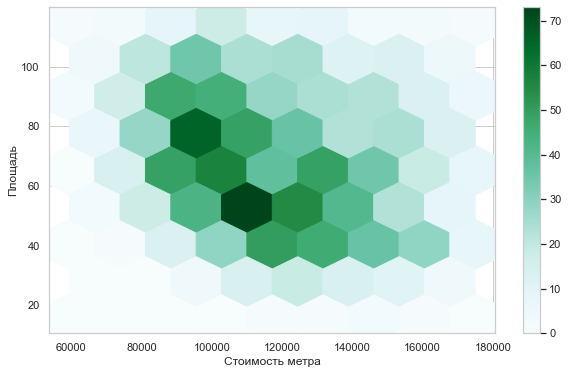

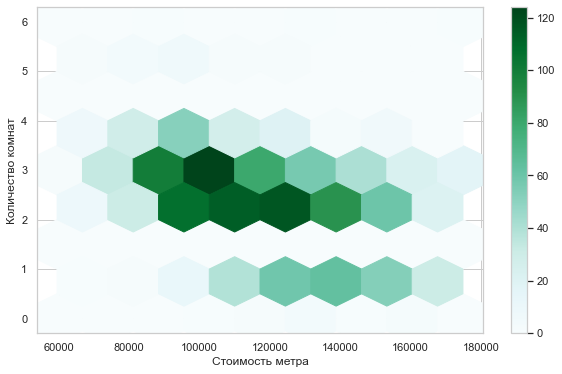

,price_per_m
rooms,
0,137346.644545
1,134914.880000
2,119867.523169
3,112378.711530
4,101951.948966
5,94623.964118
6,128125.936667


In [68]:
only_city_center.plot(x='price_per_m', y='total_area', kind='hexbin', gridsize=8, figsize=(10, 6), sharex=False, grid=True)
plt.xlabel('Стоимость метра')
plt.ylabel('Площадь')
plt.show()

only_city_center.plot(x='price_per_m', y='rooms', kind='hexbin', gridsize=8, figsize=(10, 6), sharex=False, grid=True)
plt.xlabel('Стоимость метра')
plt.ylabel('Количество комнат')
plt.show()
only_city_center.pivot_table(index = 'rooms', values = 'price_per_m') # выведем также средние цены, чтобы цифры были видны яснее

Выводы подтверждаются гексограммами. По сравнению со всем объемом данных квартиры в центре варьируются уже от 40 до 100 кв. метров. Ценник на них тоже смещен вправо и в отдельных случаях достигает 160 тыс за метр. Если больше квартиры, значит в них больше комнат: в центре, как мы уже видели, преобладают двух- и трехкомнатные. Правда, дороже всего по-прежнему остаются однокомнатные квартиры.

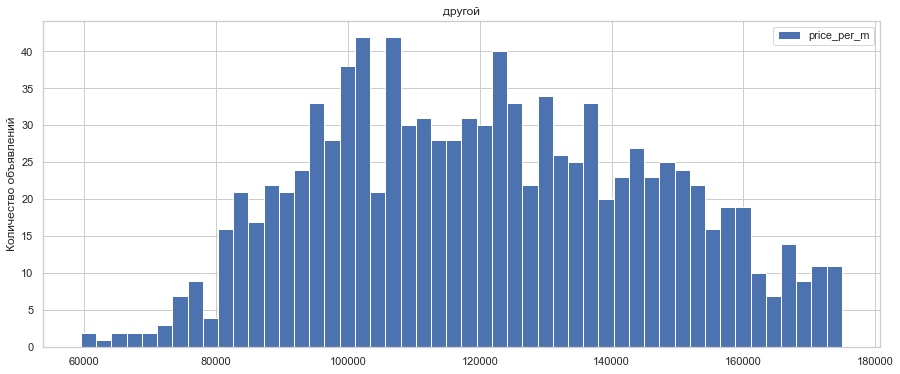

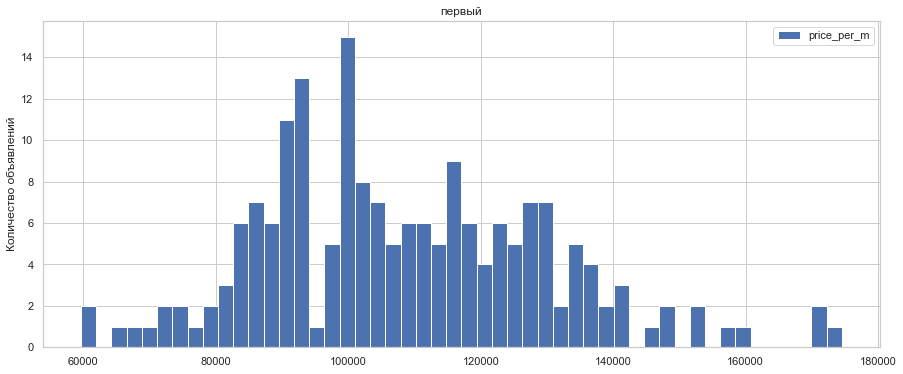

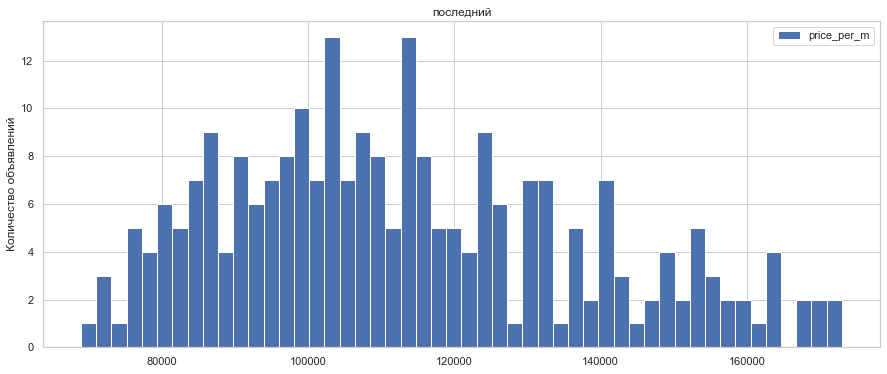

price_per_m               
                     count           mean
floors_grouped                           
другой                1028  121166.911926
первый                 186  108378.016452
последний              248  113139.995121

In [89]:
for name, group_data in only_city_center.groupby('floors_grouped'):                   # цикл перебирает каждую группу в столбце
                                                                                      # и строит гистограмму для нее отдельно
    group_data.plot(y='price_per_m', title=name, kind='hist', bins=50, figsize=(15, 6))
    plt.ylabel('Количество объявлений')
    plt.show()
    
display(only_city_center.groupby('floors_grouped').agg({'price_per_m': ['count', 'mean']})) # сводная, чтобы учточнить среднее

Здесь данные почти дублируют результаты, полученные выше. Квартиры на "других" этажах преобладают по численности и по цене. Квартир на первых и последних этажах снова меньше, а нижние еще и дешевле: второй график обрывается на отметке в 140 тыс. рублей, а третий - плавно уходит правее этой отметки. Данные подтверждаются сводной таблицей.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


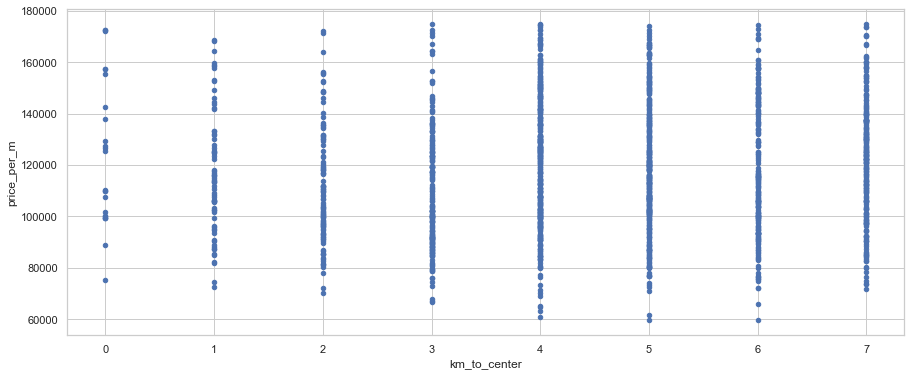

In [109]:
only_city_center.plot(kind='scatter', x='km_to_center', y='price_per_m', figsize=(15, 6), grid=True)
plt.show()                                                                       # зависимость цены от удаленности от центра

В непосредственной близости от центра расположено не так много объектов: видимо, на главных улицах преобладают все же коммерческие помещения. На расстоянии 3 км от центра линия на графике становится насыщеннее: ценник здесь выше, чем где-либо еще по городу. На участке 3-7 км график сохраняет стабильность.

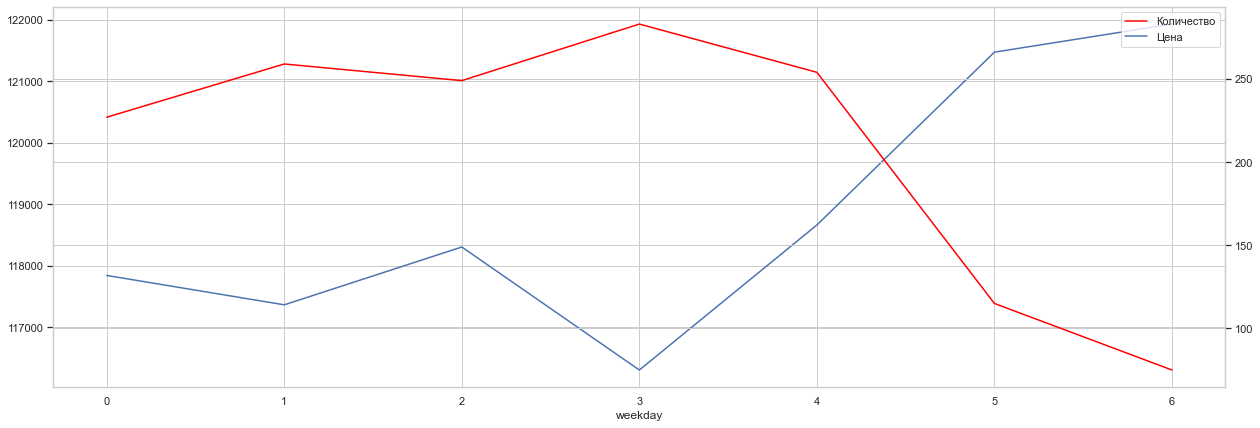

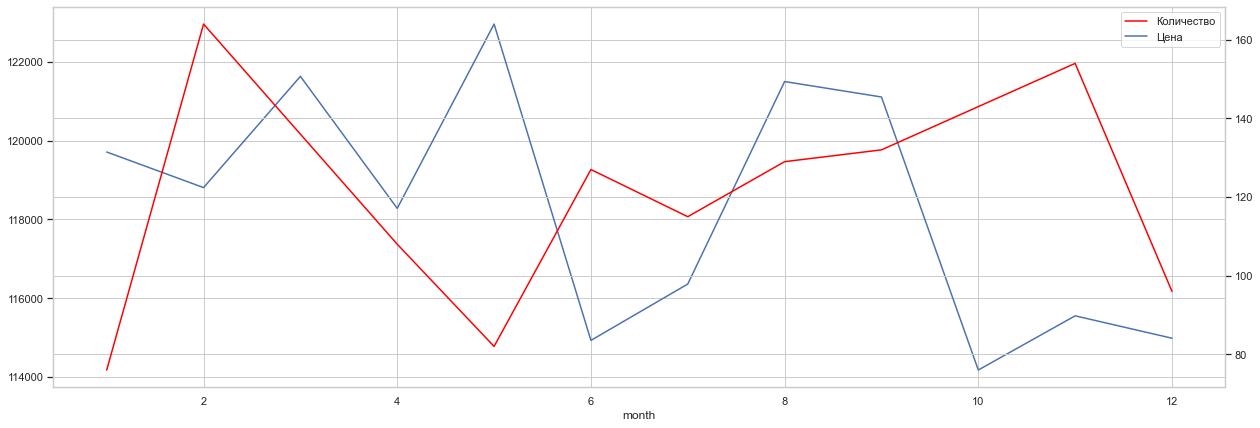

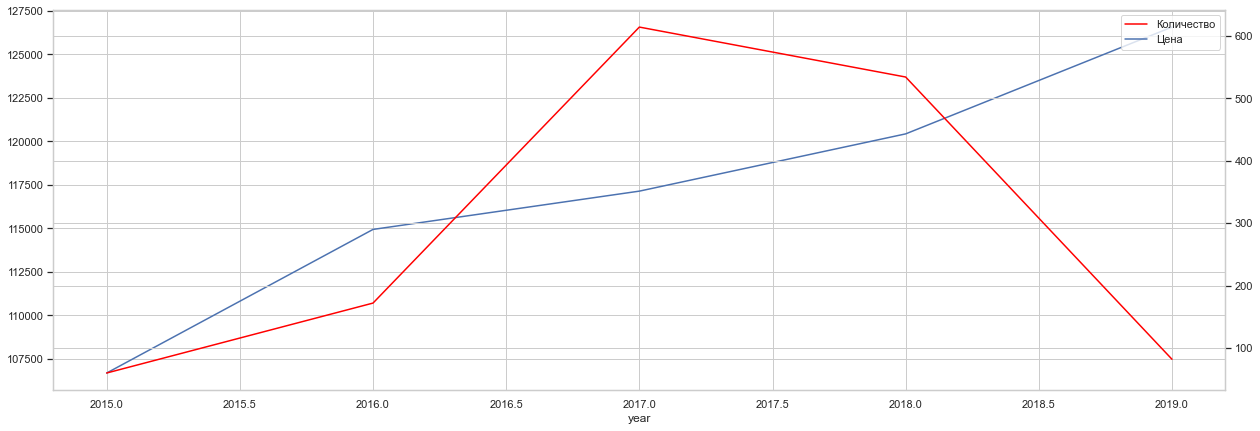

In [91]:
build_plots(only_city_center, ['weekday', 'month', 'year'])

Как и в целом по городу объявления в центре теряют активность ближе к выходным. На буднях цены по дням недели колеблются, но в цифровом отношении эти изменения незначительны. На графике по месяцам также видны уже знакомые нам пики в феврале и августе, падение активности рынке летом. На графике по годам снова отражается постепенное возрастание стоимости квадратного метра, с 2016 года растет и количество объявлений. Правда, уже в 2019 оно падает почти на 500 штук, что немало по масштабам выборки.

### Вывод

В целом выводы для квартир в центре практически полностью повторяют выводы, сделанные нами ранее. С единственным исключением: речь чаще всего идет о квартирах большей площади, и средний ценник на них тоже выше. Это объясняется, вероятно, престижностью района проживания - еще один фактор, важный при ценообразовании.

## Общий вывод

Таким образом, в ходе исследования мы установили, что на стоимость квадратного метра недвижимости в Санкт-Петербурге в значительной мере определяется следующими факторами:

- площадью жилья и количеством комнат в нем (чем меньше площадь, тем дороже квадратный метр);
- этажностью (дороже всего квартиры не на первом и не на последнем этаже);
- расположением (по мере удаления от престижных центральных районов и от Петербурга цены на жилье сильно падают);
- инфляцией (с годами ценник стабильно увеличивается);
- активностью рынка (осенью и зимой продажи идут активнее, чем летом, поэтому ценник возрастает).

Центр Петербурга предлагает более просторное и дорогое жилье. Некоторые пригороды (например, Пушкин) также стремятся к этому, но в целом по области речь идет о квартирах небольшого размера и небольшом разбросе цен. "Ловить" новые предложения стоит по будним дням.

Также во время предобработки удалось обнаружить проблему с автоматическим определением расстояний за пределами Санкт-Петербурга. Нужно подготовить баг-репорт коллегам.